In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset1=pd.read_csv('../datasets/kidney-stone-dataset.csv')
dataset1 = dataset1.drop('Unnamed: 0', axis=1)
dataset1

,gravity,ph,osmo,cond,urea,calc,target
0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...
85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,1.023870,5.106433,325,12.124689,50,0.781620,1


In [3]:
dataset2=pd.read_csv('../datasets/kidney_stone_data.csv')
dataset2 = dataset2.drop('id', axis=1)
dataset2

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,75,1.53,0
410,1.024,5.53,577,19.7,224,0.77,0
411,1.018,6.28,455,22.2,270,7.68,1
412,1.008,7.12,325,12.6,75,1.03,1


In [4]:
dataset3=pd.read_csv('../datasets/kindey stone urine analysis.csv')
dataset3

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1


In [5]:
combined_df=pd.concat([dataset1, dataset2,dataset3], ignore_index=True)
df=combined_df.copy()
df

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
578,1.025,7.90,721,23.6,301,9.04,1
579,1.017,4.81,410,13.3,195,0.58,1
580,1.024,5.40,803,21.8,394,7.82,1
581,1.016,6.81,594,21.4,255,12.20,1


In [6]:
df.shape

(583, 7)

In [7]:
df.isnull().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  583 non-null    float64
 1   ph       583 non-null    float64
 2   osmo     583 non-null    int64  
 3   cond     583 non-null    float64
 4   urea     583 non-null    int64  
 5   calc     583 non-null    float64
 6   target   583 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 32.0 KB


In [9]:
df.duplicated().sum()

77

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

<Axes: xlabel='target', ylabel='count'>

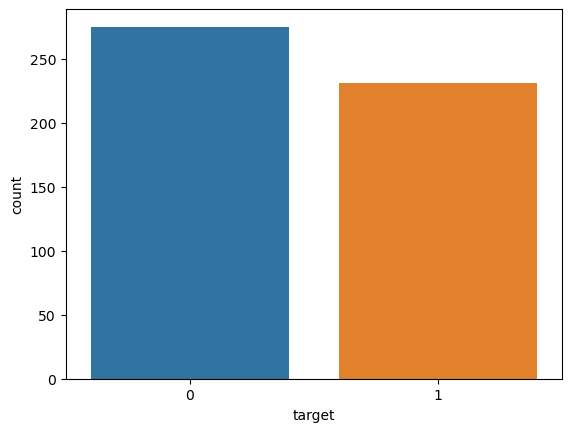

In [12]:
import seaborn as sns
sns.countplot(x='target',data=df)

<Axes: xlabel='gravity'>

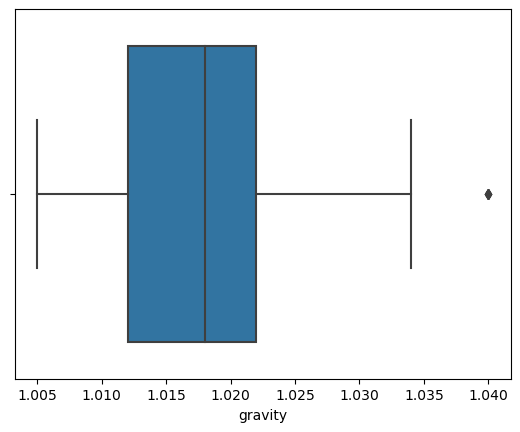

In [13]:
import seaborn as sns
sns.boxplot(data=combined_df, x='gravity')

<Axes: xlabel='ph'>

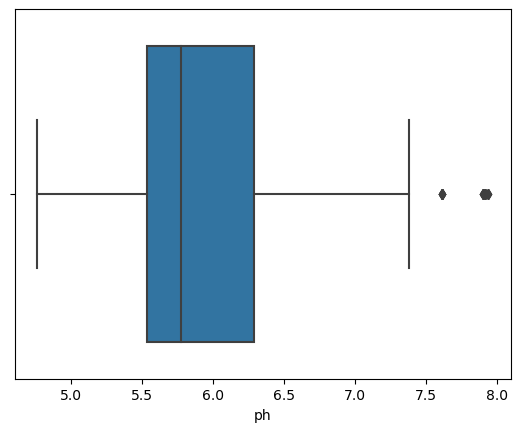

In [14]:
sns.boxplot(data=combined_df, x='ph')

<Axes: xlabel='osmo'>

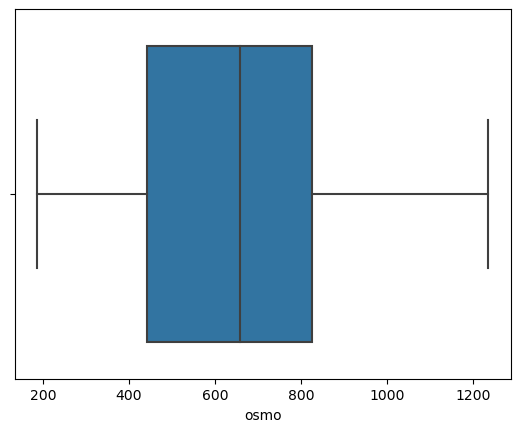

In [15]:
sns.boxplot(data=combined_df, x='osmo')

<Axes: xlabel='cond'>

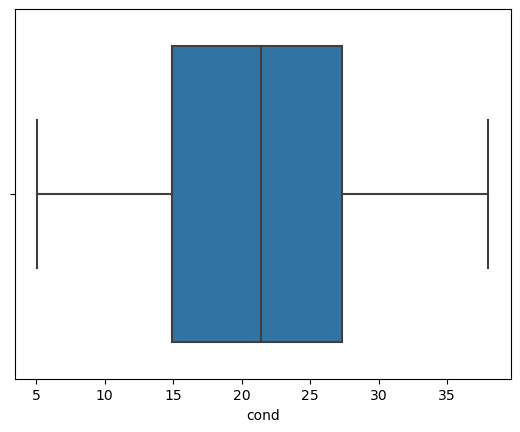

In [16]:
sns.boxplot(data=combined_df, x='cond')

<Axes: xlabel='urea'>

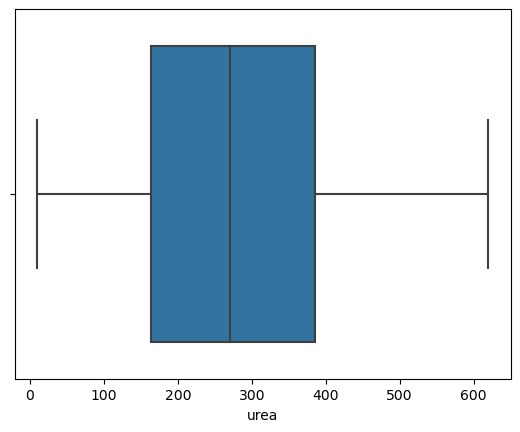

In [17]:
sns.boxplot(data=combined_df, x='urea')

<Axes: xlabel='calc'>

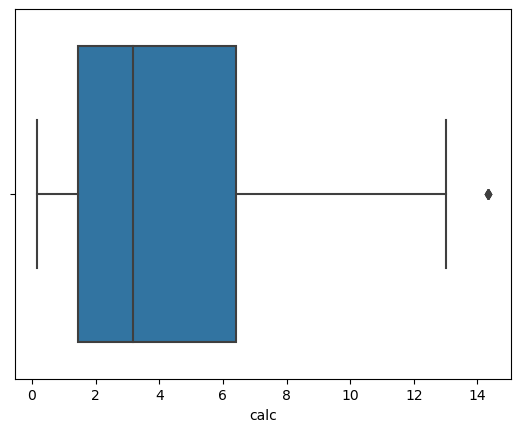

In [18]:
sns.boxplot(data=combined_df, x='calc')

# Handling outliers

In [19]:
columns = ['gravity', 'ph', 'calc']

In [20]:
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper whisker values
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Cap the outliers at the whisker values
    df[col] = np.where(df[col] < lower_whisker, lower_whisker, 
                       np.where(df[col] > upper_whisker, upper_whisker, df[col]))


C:\Users\Dell\AppData\Local\Temp\ipykernel_7064\3935736073.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_whisker, lower_whisker,
C:\Users\Dell\AppData\Local\Temp\ipykernel_7064\3935736073.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_whisker, lower_whisker,
C:\Users\Dell\AppData\Local\Temp\ipykernel_7064\3935736073.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

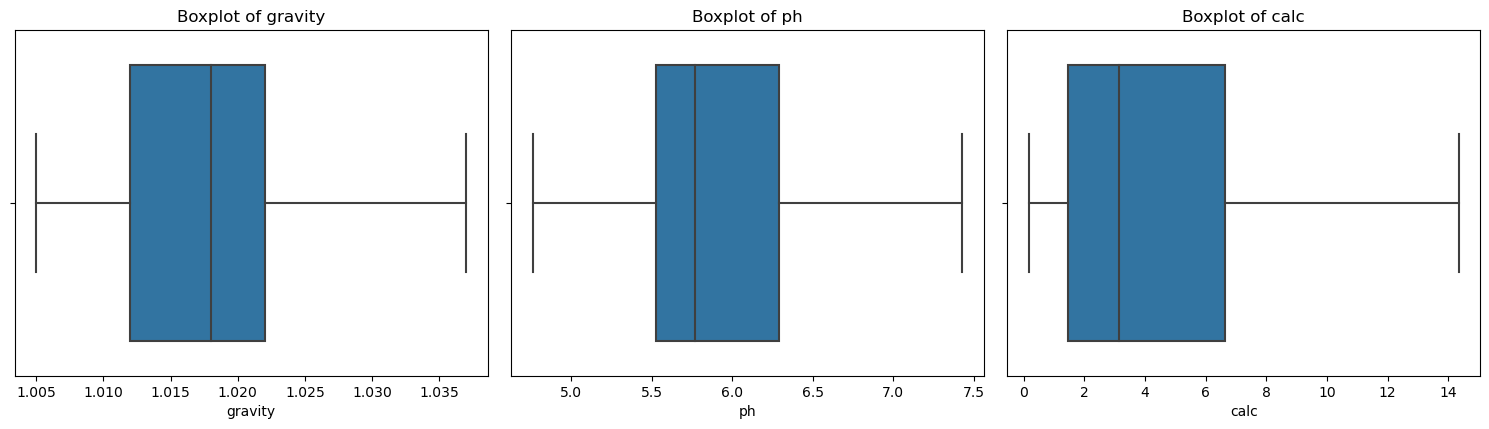

In [21]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)  # Adjust the layout as needed
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# split

In [22]:
from sklearn.model_selection import train_test_split
X=df.drop(['target'],axis=1)
Y=df['target']

In [23]:
X

,gravity,ph,osmo,cond,urea,calc
0,1.021,4.91,725,14.0,443,2.45
1,1.017,5.74,577,20.0,296,4.49
2,1.008,7.20,321,14.9,101,2.36
3,1.011,5.51,408,12.6,224,2.15
4,1.005,6.52,187,7.5,91,1.16
...,...,...,...,...,...,...
501,1.018,6.28,455,22.2,270,7.68
502,1.008,7.12,325,12.6,75,1.03
503,1.011,6.13,364,9.9,159,0.27
554,1.026,5.16,822,26.0,301,14.34


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# model

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import log_loss
from sklearn.base import BaseEstimator

In [74]:
class DecisionTreeRegressorScratch:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        """Fit the decision tree on the data"""
        # Ensure all features in X are numeric
        X = X.apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric
        X = X.fillna(0)  # Fill NaN values with 0 (or use another strategy)
        
        self.tree = self.build_tree(X, y)

    def build_tree(self, X, y, depth=0):
        """Recursively build the decision tree"""
        if (self.max_depth is not None and depth >= self.max_depth) or len(set(y)) == 1:
            return np.mean(y)  # Return the mean value for regression if no split is found

        # Find the best split based on the features
        split = self.best_split(X, y)
        if split is None:
            return np.mean(y)

        left_mask = X.iloc[:, split['feature_index']] <= split['threshold']
        right_mask = ~left_mask

        left_tree = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_tree = self.build_tree(X[right_mask], y[right_mask], depth + 1)

        return {'split': split, 'left': left_tree, 'right': right_tree}

    def best_split(self, X, y):
        """Find the best split for the data"""
        best_split = None
        best_score = float('inf')
        n_features = X.shape[1]

        for feature_index in range(n_features):
            thresholds = np.unique(X.iloc[:, feature_index])  # Use .iloc for indexing
            for threshold in thresholds:
                left_mask = X.iloc[:, feature_index] <= threshold
                right_mask = ~left_mask

                if len(left_mask) == 0 or len(right_mask) == 0:
                    continue

                left_y = y[left_mask]
                right_y = y[right_mask]

                # Compute the mean squared error for this split
                score = self.compute_mse(left_y, right_y)
                if score < best_score:
                    best_score = score
                    best_split = {'feature_index': feature_index, 'threshold': threshold}

        return best_split

    def compute_mse(self, left_y, right_y):
        """Compute mean squared error for a split"""
        left_mse = np.mean((left_y - np.mean(left_y))**2)
        right_mse = np.mean((right_y - np.mean(right_y))**2)
        return left_mse * len(left_y) + right_mse * len(right_y)

    def predict(self, X):
        """Predict using the decision tree for all samples"""
        X = X.apply(pd.to_numeric, errors='coerce')  # Ensure numeric input
        X = X.fillna(0)  # Fill NaN values
        return np.array([self.predict_single(x, self.tree) for x in X.values])

    def predict_single(self, x, tree):
        """Make a prediction for a single sample"""
        # Ensure 'x' is a numpy array
        x = np.array(x)

        if isinstance(tree, dict):
            feature_value = x[tree['split']['feature_index']]  # Extract feature value
            if feature_value <= tree['split']['threshold']:
                return self.predict_single(x, tree['left'])
            else:
                return self.predict_single(x, tree['right'])
        else:
            return tree

In [75]:
class CustomLGBM:
    def __init__(self, max_depth=None, learning_rate=0.1, n_estimators=100):
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        """Fit the custom LightGBM model"""
        X = X.apply(pd.to_numeric, errors='coerce')  # Ensure all columns are numeric
        X = X.fillna(0)  # Handle NaN values

        # Initialize residuals as the true values
        residual = y

        for _ in range(self.n_estimators):
            # Fit a regression tree to the residuals
            tree = DecisionTreeRegressorScratch(max_depth=self.max_depth)
            tree.fit(X, residual)

            # Get the leaf values (predictions from the tree)
            leaf_preds = tree.predict(X)

            # Update the model's predictions
            residual -= self.learning_rate * leaf_preds

            # Store the fitted tree model
            self.models.append(tree)

    def predict(self, X):
        """Make predictions using the ensemble of trees"""
        X = X.apply(pd.to_numeric, errors='coerce')  # Ensure all columns are numeric
        X = X.fillna(0)  # Handle NaN values

        # Sum the predictions from each tree in the ensemble
        y_pred = np.zeros(X.shape[0])
        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)

        return y_pred

    def predict_proba(self, X):
        """Predict probabilities using the ensemble of trees"""
        X = X.apply(pd.to_numeric, errors='coerce')  # Ensure all columns are numeric
        X = X.fillna(0)  # Handle NaN values

        # Calculate probabilities (for binary classification, adjust as needed)
        y_pred = self.predict(X)
        proba = 1 / (1 + np.exp(-y_pred))  # Sigmoid function for binary classification
        return proba

In [76]:
model = CustomLGBM(n_estimators=100, learning_rate=0.1, max_depth=3)

In [77]:
# Train the model
model.fit(X_train, y_train)

In [78]:
Y_pred_lgbm = model.predict(X_test)

In [80]:
Y_pred_binary = (Y_pred_lgbm >= 0.5).astype(int)

# Now calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, Y_pred_binary)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.49%


# visualize 

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("\nClassification Report:")
print(classification_report(y_test, Y_pred_binary))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        52
           1       0.77      0.72      0.74        50

    accuracy                           0.75       102
   macro avg       0.76      0.75      0.75       102
weighted avg       0.76      0.75      0.75       102



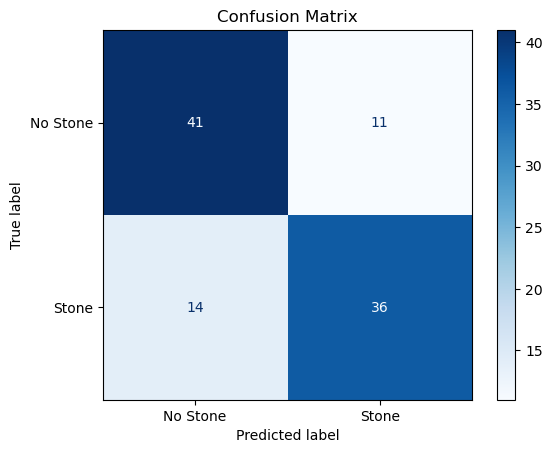

In [84]:
# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred_binary)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Stone', 'Stone'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# input prediction

In [43]:
gravity=float(input("Enter gravity: "))
ph=float(input("Enter ph: "))
osmo=float(input("Enter osmo: "))
cond=float(input("Enter cond: "))
urea=float(input("Enter urea: "))
calc=float(input("Enter calc: "))

Enter gravity: 1.021
Enter ph: 4.91
Enter osmo: 725
Enter cond: 14.0
Enter urea: 443
Enter calc: 2.45


In [44]:
input_data = pd.DataFrame({
        'gravity': [gravity],
        'osmo': [osmo],
        'ph': [ph],
        'cond': [cond],
        'urea': [urea],
        'calc': [calc]
    })

In [45]:
prediction = model_lgbm.predict(input_data)

In [46]:
print(prediction)

[0]


In [47]:
probability = model_lgbm.predict_proba(input_data)
print(probability)

[[0.51304657 0.48695343]]


In [48]:
print("probability no stone: ",probability[0][0])

probability no stone:  0.513046572016896


In [49]:
print("probability of stone: ",probability[0][1])

probability of stone:  0.48695342798310404


In [50]:
from joblib import dump, load
# Save the best model
dump(model_lgbm, 'lgbm.joblib')

['lgbm.joblib']

In [51]:
model= load('lgbm.joblib')

In [54]:
prob=model.predict_proba(input_data)

In [55]:
prob[0][0]

0.513046572016896

# Visualization

In [31]:
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': Y_pred_lgbm
})

In [34]:
# Create counts for Actual and Predicted
actual_counts = results_df['Actual'].value_counts().reset_index()
actual_counts.columns = ['Category', 'Count']
predicted_counts = results_df['Predicted'].value_counts().reset_index()
predicted_counts.columns = ['Category', 'Count']

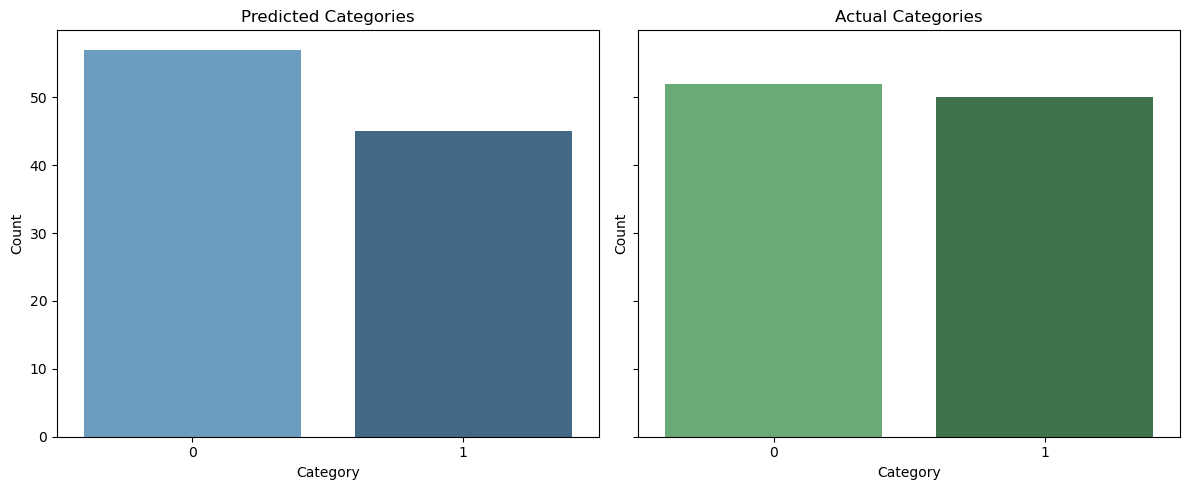

In [36]:
# Create side-by-side bar plots using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Predicted Categories
sns.barplot(data=predicted_counts, x='Category', y='Count', ax=axes[0], palette='Blues_d')
axes[0].set_title('Predicted Categories')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')

# Plot Actual Categories
sns.barplot(data=actual_counts, x='Category', y='Count', ax=axes[1], palette='Greens_d')
axes[1].set_title('Actual Categories')
axes[1].set_xlabel('Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
print('Precision:', precision_score(y_test, Y_pred_lgbm))
print('Recall:', recall_score(y_test, Y_pred_lgbm))
print('F1 Score:', f1_score(y_test, Y_pred_lgbm))
print('Classification report:', classification_report(y_test, Y_pred_lgbm))

Precision: 0.8444444444444444
Recall: 0.76
F1 Score: 0.8
Classification report:               precision    recall  f1-score   support

           0       0.79      0.87      0.83        52
           1       0.84      0.76      0.80        50

    accuracy                           0.81       102
   macro avg       0.82      0.81      0.81       102
weighted avg       0.82      0.81      0.81       102



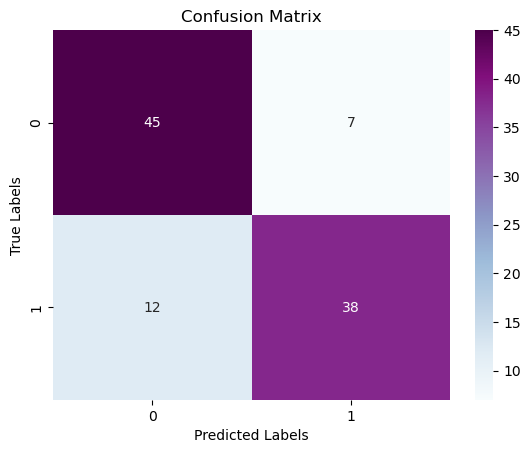

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_lgbm.predict(X_test))

sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_lgbm.predict(X_test))

In [40]:
cm

array([[45,  7],
       [12, 38]], dtype=int64)